# Data Visualization and Charts
By Josh Houlding

In this assignment, you will create effective data visualizations for a given dataset using Python libraries like Matplotlib, Seaborn, or Plotly. You will apply principles of chart design to evaluate and improve the effectiveness of data visualizations, and communicate data insights to a specific audience using appropriate language and visual cues.

# Task 1
Locate a dataset (e.g., from Kaggle, UCI Machine Learning Repository) from the list of "Repositories for Finding Suitable Datasets," located in Class Resources, or use one provided by your instructor. The dataset should include at least 8 variables or different types.

Dataset selected: [🍯 Save the bees 🐝 (Kaggle)](https://www.kaggle.com/datasets/m000sey/save-the-honey-bees)

"Analyze the population of honey bees in the United States from 2015 to 2022" 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import warnings

# Load and view the dataset
df = pd.read_csv("save_the_bees.csv")
df_with_us_totals = df
df = df[df["state"] != "United States"] # Remove nationwide data from dataframe
df.head()

,state,num_colonies,max_colonies,lost_colonies,percent_lost,added_colonies,renovated_colonies,percent_renovated,quarter,year,varroa_mites,other_pests_and_parasites,diseases,pesticides,other,unknown
0,Alabama,7000,7000,1800,26,2800,250,4,1,2015,10.0,5.4,0.0,2.2,9.1,9.4
1,Arizona,35000,35000,4600,13,3400,2100,6,1,2015,26.9,20.5,0.1,0.0,1.8,3.1
2,Arkansas,13000,14000,1500,11,1200,90,1,1,2015,17.6,11.4,1.5,3.4,1.0,1.0
3,California,1440000,1690000,255000,15,250000,124000,7,1,2015,24.7,7.2,3.0,7.5,6.5,2.8
4,Colorado,3500,12500,1500,12,200,140,1,1,2015,14.6,0.9,1.8,0.6,2.6,5.9


# Task 2
Using Python and appropriate data visualization libraries, create at least two different visualizations for each variable in the dataset selected in Prompt 1 above. Your visualizations should include at least one bar chart, one line chart, one scatter plot, and one histogram.

### Variable: `num_colonies`


First, let's create a bar graph showing the numbers of colonies in each state in 2015 and 2022.

<Figure size 1800x800 with 0 Axes>

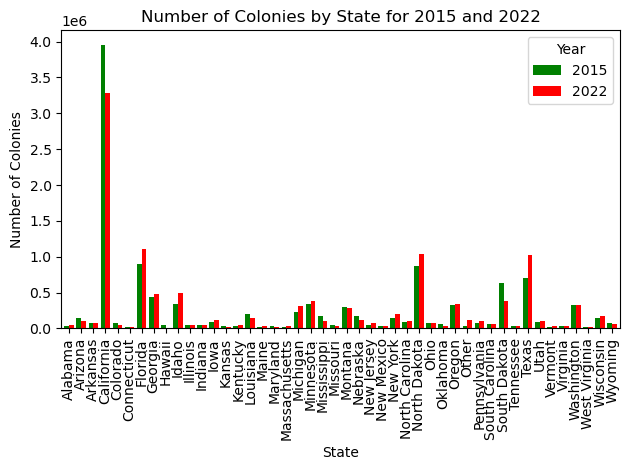

In [3]:
# Filter and group the data
df_2015_and_2022 = df[(df['year'] == 2015) | (df['year'] == 2022)]
df_2015_and_2022 = df_2015_and_2022[df_2015_and_2022["state"] != "United States"]
grouped_data = df_2015_and_2022.groupby(["state", "year"])["num_colonies"].sum().unstack()

# Plot the data
plt.figure(figsize=(18, 8))
grouped_data.plot(kind="bar", width=0.8, color=["green", "red"])
plt.xlabel("State")
plt.ylabel("Number of Colonies")
plt.title("Number of Colonies by State for 2015 and 2022")
plt.legend(title="Year", labels=["2015", "2022"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

We notice that California towers above every other state in colony count over the years. However, it has dropped over that period. Many of the states that saw an increase in colony count are red states, like Texas, Florida and North Dakota. Let's create a boxplot showing which states are officially outliers in terms of total colony count. 

In [4]:
# Create new dataset for average number of colonies from 2015 to 2022
avg_colonies_by_state = df.groupby("state")["num_colonies"].mean().to_frame()
pd.set_option("display.max_columns", None)
avg_colonies_by_state.head(46).transpose()

avg_colonies_by_state["num_colonies"] = np.floor(avg_colonies_by_state["num_colonies"]).astype(int)
avg_colonies_by_state.head(46).transpose()

state,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Other,Pennsylvania,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
num_colonies,8387,27935,20725,900322,18493,3629,247806,122322,16000,101387,11403,10412,29241,5938,8393,46451,5683,7109,6283,70967,79064,31177,8758,74822,30774,12487,5838,43354,21161,252677,17080,11361,86096,10636,20274,14612,107387,10129,208387,22741,6806,7967,72741,6958,42016,17603


<Axes: xlabel='num_colonies'>

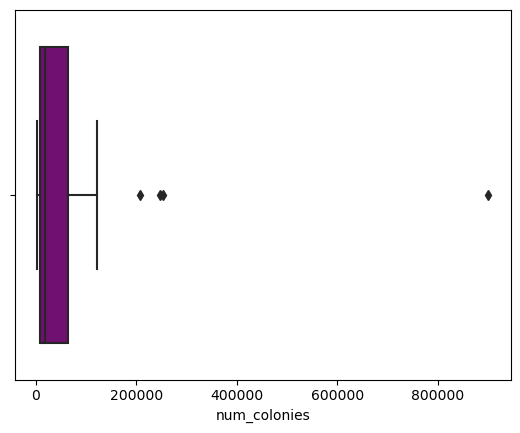

In [5]:
# Create the boxplot
sns.boxplot(x=avg_colonies_by_state["num_colonies"], color="purple")

In [6]:
# Find states which are outliers using IQR method
Q1 = avg_colonies_by_state["num_colonies"].quantile(0.25)
Q3 = avg_colonies_by_state["num_colonies"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = avg_colonies_by_state[(avg_colonies_by_state["num_colonies"] < lower_bound) | (avg_colonies_by_state["num_colonies"] > upper_bound)]
outliers.head().transpose()

state,California,Florida,North Dakota,Texas
num_colonies,900322,247806,252677,208387


California, Florida, North Dakota and Texas have all had massive bee populations between 2015 and 2022. North Dakota even had about 1 colony per 3 inhabitants, which is incredible!

### Variable: `max_colonies`

Let's create a histogram to view the distribution of the average maximum number of colonies every state had over the years. 

In [7]:
# Find average max number of colonies for each state
avg_max_colonies_by_state = df.groupby("state")["max_colonies"].mean().to_frame()
avg_colonies_by_state.head(46).transpose()

state,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Other,Pennsylvania,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
num_colonies,8387,27935,20725,900322,18493,3629,247806,122322,16000,101387,11403,10412,29241,5938,8393,46451,5683,7109,6283,70967,79064,31177,8758,74822,30774,12487,5838,43354,21161,252677,17080,11361,86096,10636,20274,14612,107387,10129,208387,22741,6806,7967,72741,6958,42016,17603


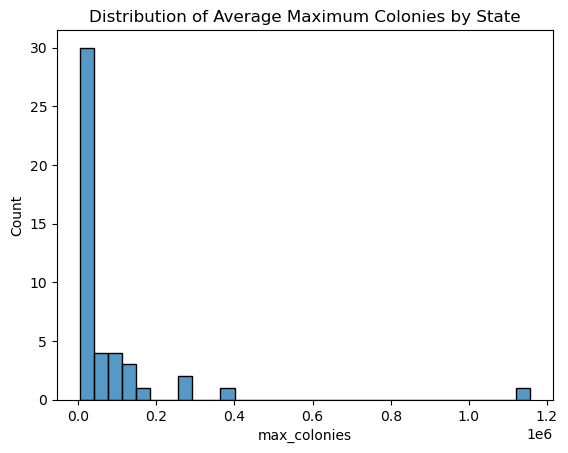

In [36]:
# Create histogram 
sns.histplot(avg_max_colonies_by_state["max_colonies"])
plt.title("Distribution of Average Maximum Colonies by State")
plt.show()

We see that most states reached around 0-30,000 colonies total, with a few getting past 200,000. We can also see this insight in a different way: 

<Axes: xlabel='max_colonies'>

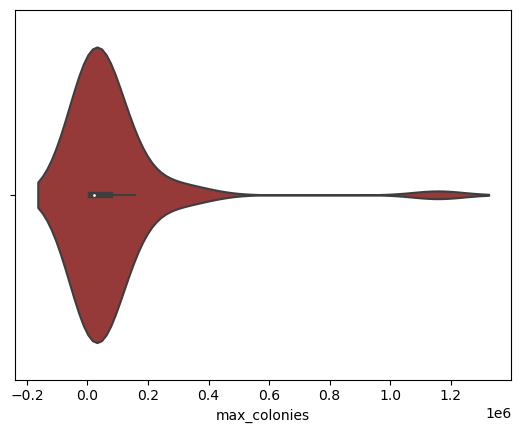

In [9]:
sns.violinplot(x=avg_max_colonies_by_state["max_colonies"], color="brown")

This violin plot shows the same general insight as the histogram, that is to say most states are clustered on the low end of maximum colonies. 

### Variable: `lost_colonies`

We can visualize trends in colony loss through a line chart with the first 5 states alphabetically (other than California) that shows the rate of change of `lost_colonies` from 2015 to 2022. 

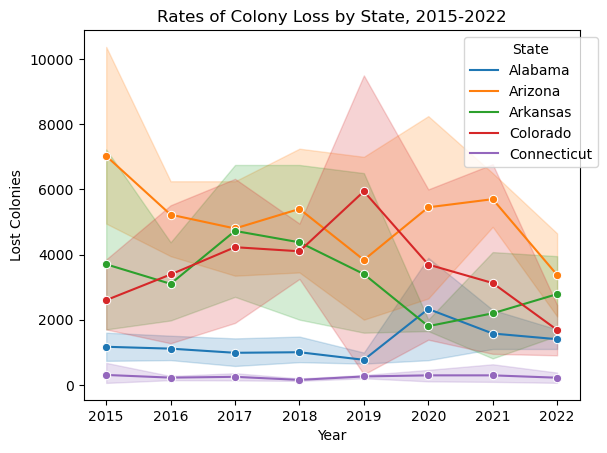

In [35]:
# Look at the first 5 states alphabetically
state_mask = (df["state"] == "Alabama") | (df["state"] == "Arizona") | (df["state"] == "Arkansas") | (df["state"] == "Colorado") | (df["state"] == "Connecticut")
df_first_5_states = df[state_mask]

# Create the plot
sns.lineplot(x="year", y="lost_colonies", hue="state", data=df_first_5_states, marker="o")
plt.xlabel("Year")
plt.ylabel("Lost Colonies")
plt.title("Rates of Colony Loss by State, 2015-2022")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper right")
plt.show()

We can see that Connecticut and Alabama saw a relatively consistent rate of colony decline, while the other 3 states saw rises and falls in their rates. Fortunately, we can see an overall trend among those 3 of the rate of colony loss decreasing over time. 

Next, let's see which 10 states lost the most colonies in total from 2015 to 2022. We can do this using a simple bar graph.

In [11]:
colors = ['#7a3ca2', '#8fa042', '#c17e51', '#29a4dd', '#c7582b', '#5d96d3', '#8a33a0', '#4d8a3e', '#e6972b', '#6442b7']

# Find 10 states with the largest total colony losses
top_10_states_colony_loss = df.groupby("state")["lost_colonies"].sum()
top_10_states_colony_loss = top_10_states_colony_loss.to_frame().sort_values(by="lost_colonies", ascending=False).reset_index()
top_10_states_colony_loss = top_10_states_colony_loss.head(10)
top_10_states_colony_loss.transpose()

,0,1,2,3,4,5,6,7,8,9
state,California,Florida,North Dakota,Texas,Georgia,South Dakota,Idaho,Minnesota,Michigan,Washington
lost_colonies,4098000,1161000,949860,822000,566500,488740,409700,305020,272200,258900


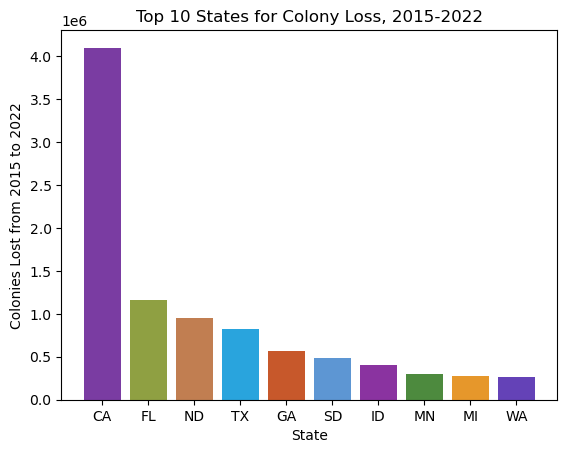

In [12]:
# Graph these 10 states
state_abbreviations = ["CA", "FL", "ND", "TX", "GA", "SD", "ID", "MN", "MI", "WA"]

plt.bar(state_abbreviations, top_10_states_colony_loss["lost_colonies"], color=colors)
plt.xlabel("State")
plt.ylabel("Colonies Lost from 2015 to 2022")
plt.title("Top 10 States for Colony Loss, 2015-2022")
plt.show()

As we could have predicted, California has seen a massive number of its colonies lost, because of its gargantuan population. It towers above the other 9 states. Interestingly, most of the states with the highest losses are red politically, but the one with the highest losses by far is a blue state. 

### Variable: `percent_lost`

First, let's check out a histogram to see the average percentages of their colonies each state lost. 

In [13]:
# Find the average percentage of colonies each state lost
avg_percent_loss_by_state = df.groupby("state")["percent_lost"].mean().to_frame().reset_index()
avg_percent_loss_by_state.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
state,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Other,Pennsylvania,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
percent_lost,14.645161,17.290323,14.225806,10.806452,13.548387,6.709677,13.935484,14.225806,4.666667,10.322581,14.064516,13.645161,10.322581,19.258065,13.935484,7.935484,10.612903,12.451613,11.16129,10.774194,9.258065,10.903226,10.967742,5.516129,8.903226,5.193548,16.741935,11.580645,12.645161,7.096774,13.83871,10.290323,7.967742,10.290323,11.774194,11.290323,8.645161,15.516129,9.193548,11.258065,4.83871,12.612903,8.483871,11.677419,12.580645,9.354839


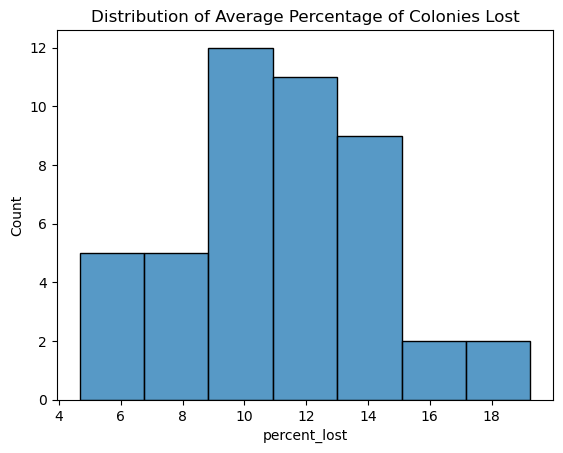

In [33]:
# Create the histogram
sns.histplot(avg_percent_loss_by_state["percent_lost"])
plt.title("Distribution of Average Percentage of Colonies Lost")
plt.show()

We notice that the distribution of percentage losses is roughly normal, with a slight skew toward the lower side. Most states appear to have lost an average of 10-14% of their colonies over the 7-year period the data covers. 

Next, let's explore the potential correlation between `percent_lost` and `num_colonies` to see if the percentage of colonies a state lost is related to how many colonies it had in total. 

In [15]:
# Create new dataframe with num_colonies and percent_lost averages
avg_num_colonies_by_state = df.groupby("state")["num_colonies"].mean().reset_index()
avg_percent_loss_by_state["num_colonies"] = avg_num_colonies_by_state["num_colonies"]
avg_percent_loss_by_state.head().transpose()

,0,1,2,3,4
state,Alabama,Arizona,Arkansas,California,Colorado
percent_lost,14.645161,17.290323,14.225806,10.806452,13.548387
num_colonies,8387.096774,27935.483871,20725.806452,900322.580645,18493.548387


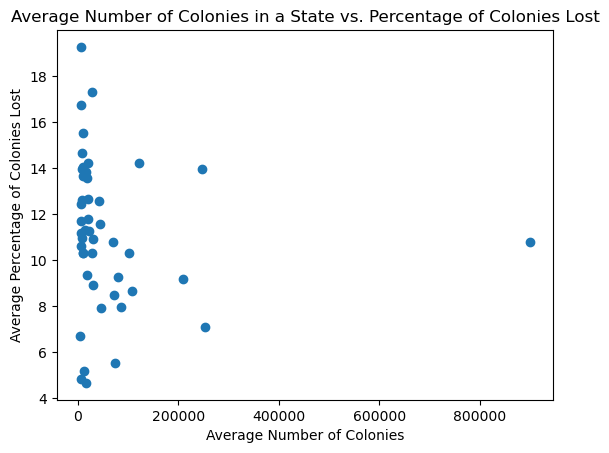

In [16]:
# Create the scatterplot
plt.scatter(avg_percent_loss_by_state["num_colonies"], avg_percent_loss_by_state["percent_lost"])
plt.title("Average Number of Colonies in a State vs. Percentage of Colonies Lost")
plt.xlabel("Average Number of Colonies")
plt.ylabel("Average Percentage of Colonies Lost")
plt.show()

There does not appear to be any meaningful relationship between how many colonies a state had and what percentage of them were lost over the time period 2015-2022. 

### Variable: `added_colonies`
Let's view a violin plot to see the distribution of the total number of colonies added by each state from 2015 to 2022. 

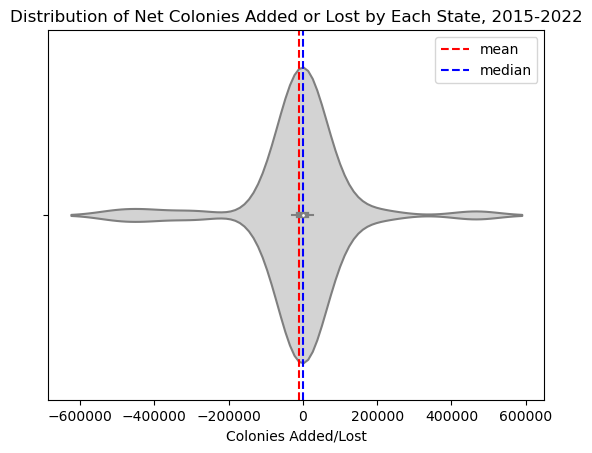

In [17]:
# Get net number of colonies added or lost by each state, 2015-2022
total_colonies_added_by_state = df.groupby("state")["added_colonies"].sum()
total_colonies_lost_by_state = df.groupby("state")["lost_colonies"].sum()
net_colonies_added_or_lost_by_state = total_colonies_added_by_state - total_colonies_lost_by_state

# Plot the data
plt.axvline(x=net_colonies_added_or_lost_by_state.mean(), color="red", linestyle="--", label="mean")
plt.axvline(x=net_colonies_added_or_lost_by_state.median(), color="blue", linestyle="--", label="median")
plt.legend(loc="upper right")
sns.violinplot(x=net_colonies_added_or_lost_by_state, color="#D3D3D3")
plt.title("Distribution of Net Colonies Added or Lost by Each State, 2015-2022")
plt.xlabel("Colonies Added/Lost")
plt.show()

We see that the vast majority of states added or lost between 0 and 200,000 colonies, with a few losing considerably more than that, and even fewer gaining considerably more. This skew toward states that have seen a net loss in colony count is further reinforced by the mean being less than the median, as shown in the plot. 

It would be interesting to see which years were the best for the bees. We can see this through a line chart displaying the total number of colonies added or lost each year across the US. 

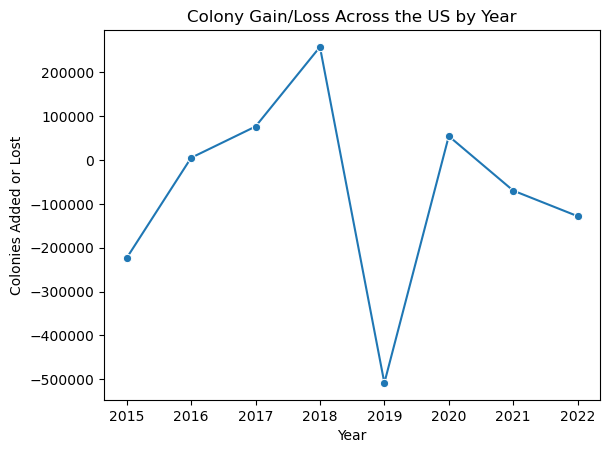

In [18]:
# Find the net change in colony count nationally every year
total_colonies_added_per_year = df.groupby("year")["added_colonies"].sum()
total_colonies_lost_per_year = df.groupby("year")["lost_colonies"].sum()
net_colonies_added_or_lost = total_colonies_added_per_year - total_colonies_lost_per_year
years = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

# Create the plot
sns.lineplot(x=years, y=net_colonies_added_or_lost, data=net_colonies_added_or_lost, marker="o")
plt.title("Colony Gain/Loss Across the US by Year")
plt.xlabel("Year")
plt.ylabel("Colonies Added or Lost")
plt.show()

We can see that 2019 was a catastrophic year for the bees, with over 500,000 colonies lost during that year alone. Things were improving from 2015 to 2018, with 2018 being the best year with almost 300,000 colonies added. 

### Variable: `renovated_colonies`

Let's start by viewing the distribution of the total number of renovated colonies by state. 

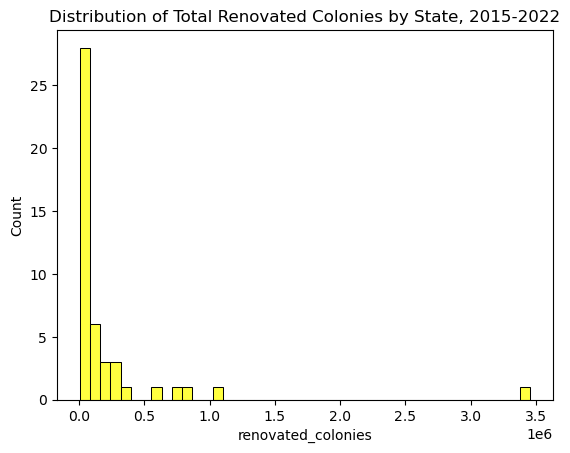

In [44]:
# Find total number of renovated colonies for each state
total_renovated_by_state = df.groupby("state")["renovated_colonies"].sum()
sns.histplot(total_renovated_by_state, color="yellow")
plt.title("Distribution of Total Renovated Colonies by State, 2015-2022")
plt.show()

As expected, most states renovated around 100,000 colonies total from 2015 to 2022, which is on the lower side. However, a few states renovated over a million. Let's see which these are: 

In [20]:
# Find states that renovated over a million colonies
total_renovated_by_state = total_renovated_by_state.to_frame().reset_index()
total_renovated_by_state.sort_values(by="renovated_colonies", ascending=False).head(3)

,state,renovated_colonies
3,California,3457000
38,Texas,1063930
6,Florida,848500


We see that California and Texas renovated over a million colonies each, with Florida trailing behind by a bit. This is not surprising, given the massive populations of these 3 states. 

Next, we can see a bar graph showing the actual numbers of colonies renovated by each state in total. 

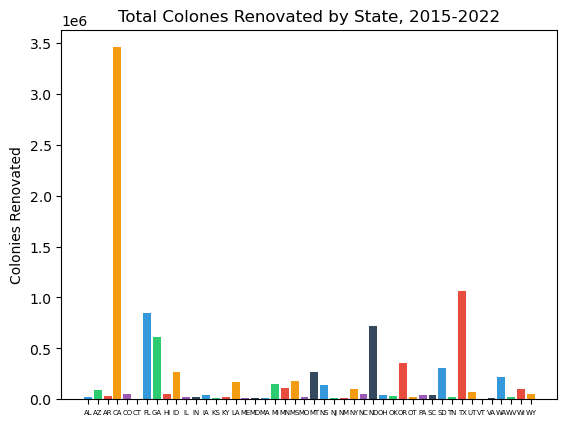

In [42]:
# Plot total colonies renovated by state in a bar graph
state_abbreviations = ["AL", "AZ", "AR", "CA", "CO", "CT", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NS", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "OT", "PA", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
plt.bar(total_renovated_by_state["state"], total_renovated_by_state["renovated_colonies"], color=colors)
plt.xticks(range(len(state_abbreviations)), state_abbreviations, fontsize=5)
plt.ylabel("Colonies Renovated")
plt.title("Total Colones Renovated by State, 2015-2022")
plt.show()

To no surprise, California, Texas and Florida renovated the msot colonies. However, it is interesting to note how many North Dakota renovated, considering the state's small population. 

### Variable: `percent_renovated`
We can view the distribution of the average percentages of colonies renovated by each state using a violin plot. 

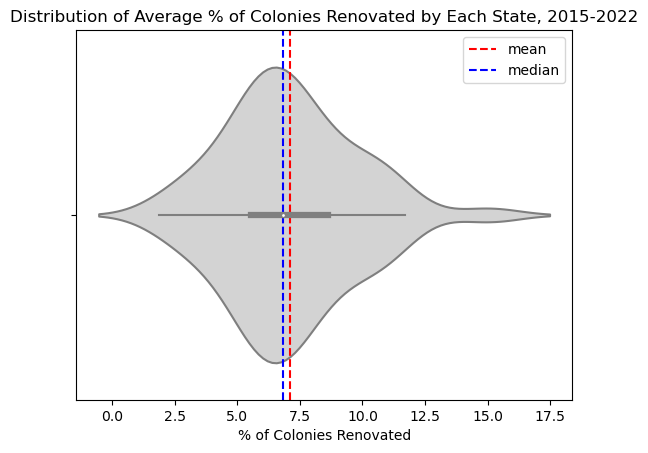

In [22]:
avg_percent_renovated_by_state = df.groupby("state")["percent_renovated"].mean()

# Plot the data
plt.axvline(x=avg_percent_renovated_by_state.mean(), color="red", linestyle="--", label="mean")
plt.axvline(x=avg_percent_renovated_by_state.median(), color="blue", linestyle="--", label="median")
plt.legend(loc="upper right")
sns.violinplot(x=avg_percent_renovated_by_state, color="#D3D3D3")
plt.title("Distribution of Average % of Colonies Renovated by Each State, 2015-2022")
plt.xlabel("% of Colonies Renovated")
plt.show()

Most states renovated between 2.5% and 12.5% of their colonies between 2015 and 2022. 

We can also see what portion of the total colonies was renovated for each state using a stacked bar chart. 

In [24]:
# Get total colonies and percent of renovated colonies for each state
renovated_colonies_proportion_df = df.groupby("state")["num_colonies"].mean().to_frame()
renovated_colonies_proportion_df["percent_renovated"] = df.groupby("state")["percent_renovated"].mean()
renovated_colonies_proportion_df["num_renovated"] = renovated_colonies_proportion_df["num_colonies"] * (renovated_colonies_proportion_df["percent_renovated"] / 100)
renovated_colonies_proportion_df = renovated_colonies_proportion_df.reset_index()
renovated_colonies_proportion_df.head()

,state,num_colonies,percent_renovated,num_renovated
0,Alabama,8387.096774,7.580645,635.796046
1,Arizona,27935.483871,9.096774,2541.227888
2,Arkansas,20725.806452,5.419355,1123.204995
3,California,900322.580645,10.451613,94098.231009
4,Colorado,18493.548387,5.516129,1020.127992


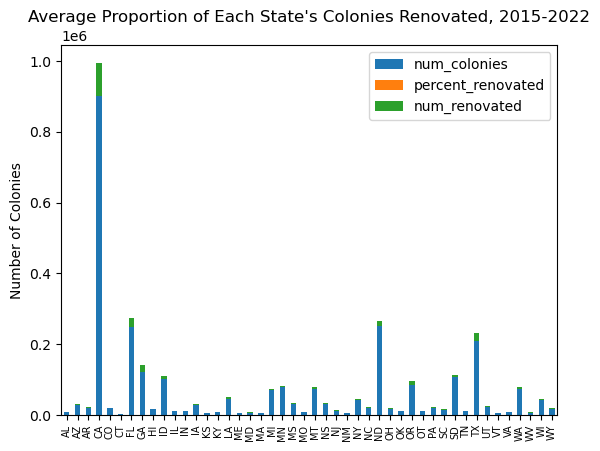

In [26]:
renovated_colonies_proportion_df.plot(kind="bar", stacked=True)
plt.xticks(range(len(state_abbreviations)), state_abbreviations, fontsize=7)
plt.ylabel("Number of Colonies")
plt.title("Average Proportion of Each State's Colonies Renovated, 2015-2022")
plt.show()

The proportions of total colonies that were renovated is in the single-digit percentage range for most states, with the exception of California at 10%. This shows that most new colonies were built from scratch, not revitalized. 

### Variables `varroa_mites`, `other_pests_and_parasites`, `diseases`, `pesticides`, `other`, and `unknown`
We can visualize the remaining variables together, as they all pertain to the percentages of colonies affected by various ailments. Let's first examine the distributions using histograms. 

In [28]:
# Create dataframe with average percentages of each variable
avg_percentage_of_ailments = df.groupby("state")["varroa_mites"].mean().to_frame()
avg_percentage_of_ailments["other_pests_and_parasites"] = df.groupby("state")["other_pests_and_parasites"].mean()
avg_percentage_of_ailments["diseases"] = df.groupby("state")["diseases"].mean()
avg_percentage_of_ailments["pesticides"] = df.groupby("state")["pesticides"].mean()
avg_percentage_of_ailments["other"] = df.groupby("state")["other"].mean()
avg_percentage_of_ailments["unknown"] = df.groupby("state")["unknown"].mean()
avg_percentage_of_ailments.reset_index().head()

,state,varroa_mites,other_pests_and_parasites,diseases,pesticides,other,unknown
0,Alabama,34.393548,25.170968,1.545161,5.919355,6.306452,6.935484
1,Arizona,34.090323,8.193548,4.093548,6.264516,7.906452,5.387097
2,Arkansas,40.703226,17.119355,2.545161,16.225806,5.503226,6.596774
3,California,39.338710,12.274194,7.164516,11.658065,10.080645,4.438710
4,Colorado,32.861290,3.187097,3.041935,4.361290,5.987097,2.870968


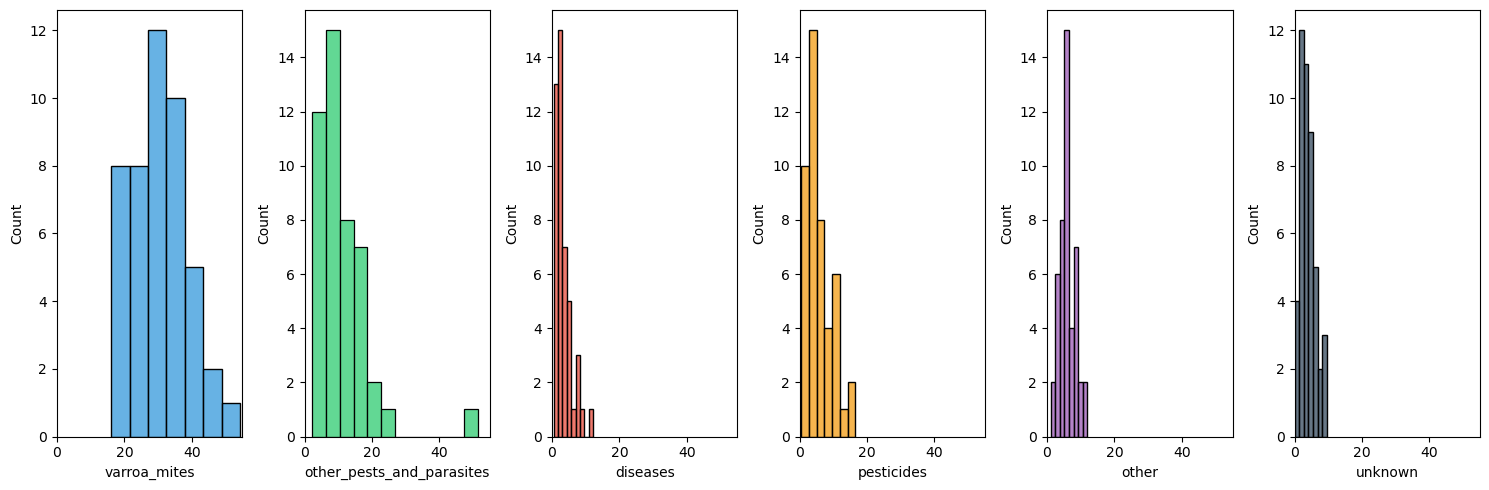

In [29]:
# Create grid of histograms for analysis
fig, axes = plt.subplots(1, len(avg_percentage_of_ailments.columns), figsize=(15,5))
colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12', '#9b59b6', '#34495e']

# Create a histogram for each column
for i, column in enumerate(avg_percentage_of_ailments.columns): 
    sns.histplot(data=avg_percentage_of_ailments, x=column, ax=axes[i], color=colors[i])
    axes[i].set_xlim(0, 55)
    
plt.tight_layout()
plt.show()

It is immediately clear that varroa mites are a massive problem for bee colonies, usually affecting between 20% and 40% of colonies in every state. Other pests are also a significant problem. Comparatively, diseases, pesticides, and other and unknown causes are less dangerous, but should still be addressed wherever possible. 

It might be worth visualizing whether a correlation exists between the average number of colonies a state lost and the prevalence of each ailment in colonies in that state. 

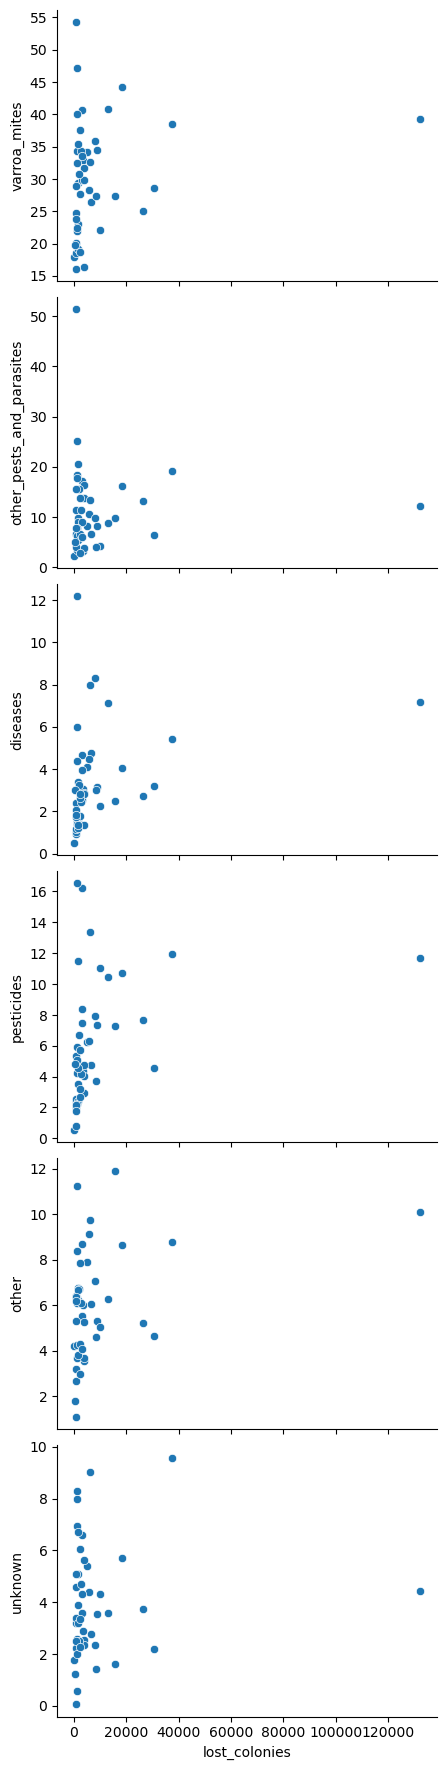

In [30]:
# Add column for average number of colonies lost 
avg_percentage_of_ailments["lost_colonies"] = df.groupby("state")["lost_colonies"].mean()

# Create grid of scatterplots for analysis
warnings.filterwarnings("ignore")
columns = ['varroa_mites', 'other_pests_and_parasites', 'diseases', 'pesticides', 'other', 'unknown']

sns.pairplot(avg_percentage_of_ailments, x_vars=['lost_colonies'], y_vars=columns, kind='scatter', height=3, aspect=1.5)
plt.show()

We can see a slight correlation with most of these ailments, with the strongest apparent correlation being with `other_pests_and_parasites` and `diseases`. 

### Task 3
Evaluate the effectiveness of your visualizations and identify at least two areas for improvement based on principles of chart design (e.g., clarity, simplicity, consistency).

Overall, I believe my graphs and charts effectively convey the insights I uncovered during my analysis, but there are several areas for improvement: 

1. The x-axis labels on my bar graphs are sometimes cramped, because there are 46 states to fit in. I find that x-axis labels look better when there are less of them overall, because when there are too many, they get squished together and hard to read.
    * I started using state abbreviations and smaller font sizes, but this made the labels harder to read. 
2. I could use a more consistent color scheme for a more professional visual style. Initially, I colored my visuals only to make them pop to viewers, but having a consistent color palette would make the report more cohesive overall. 

The graphs in this notebook have been updated to reflect these changes. 